In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
datos= pd.read_csv('datosusdcop.csv')
datos

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,08.11.2022,"4.974,00","5.107,00","5.123,13","4.964,91",NaN,"-2,55%"
1,07.11.2022,"5.104,00","5.096,59","5.109,00","5.089,85",NaN,"0,33%"
2,04.11.2022,"5.087,00","5.068,85","5.118,17","4.999,92",NaN,"0,57%"
3,03.11.2022,"5.057,94","5.003,03","5.105,35","5.000,53",NaN,"1,20%"
4,02.11.2022,"4.998,03","5.003,50","5.010,30","4.969,93",NaN,"-0,10%"
5,01.11.2022,"5.003,00","4.936,60","5.015,25","4.887,83",NaN,"1,49%"
6,31.10.2022,"4.929,35","4.835,00","4.946,33","4.829,75",NaN,"2,22%"
7,28.10.2022,"4.822,08","4.800,00","4.867,71","4.760,04",NaN,"0,73%"
8,27.10.2022,"4.787,08","4.884,06","4.889,98","4.792,79",NaN,"-1,73%"
9,26.10.2022,"4.871,14","4.975,20","4.989,34","4.873,38",NaN,"-1,86%"


In [46]:
ultimo= datos.loc[:,'Último']
ul= ultimo.to_numpy()
for i in range(len(ul)):
  a=  ul[i].replace(".", "")
  a= a.replace(',','.')
  ul[i]= float(a)

In [47]:
ul= ul[::-1]

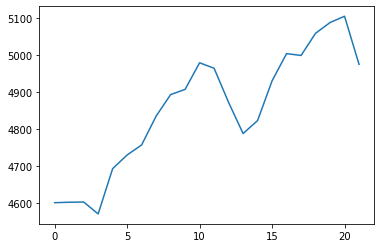

In [48]:
plt.plot(ul)
plt.show()

In [49]:
rend= [np.log(ul[i]/ul[i-1]) for i in range(1,len(ul))]

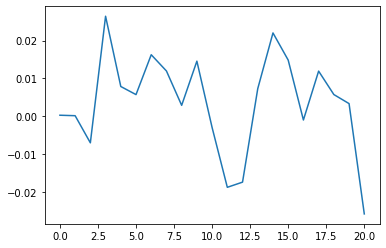

In [50]:
plt.plot(rend)
plt.show()

In [51]:
def MBEU(numTrayectorias, numPuntos):
  delta_t = 1/numPuntos
  mb = np.zeros((numTrayectorias, numPuntos+1))
  for i in range(numTrayectorias):
    for j in range(1, numPuntos+1):
      mb[i,j] = mb[i,j-1] + np.sqrt(delta_t) * np.random.normal(0, 1)
  return mb

In [52]:
def milstein(numTrayectorias, numPuntos,mb,s0, mu, sigma):
  delta_t = 1/numPuntos
  st= np.zeros((numTrayectorias,numPuntos+1))
  st[:,0]= s0

  for i in range(numTrayectorias):
    for j in range(1,numPuntos+1):
      st[i,j]= st[i,j-1] + mu*st[i,j-1]*delta_t +sigma*st[i,j-1]*(mb[i,j]-mb[i,j-1]) + (1/2)*(sigma**2)*st[i,j-1]*((mb[i,j]-mb[i,j-1])**2-delta_t)
  return st

In [53]:
def mediana(St, numTrayectorias):
    I = []
    for i in range(numTrayectorias):
        suma = 0
        for j in range(numTrayectorias):
            suma += np.linalg.norm(St[i,:]-St[j,:],np.inf)
        I.append(suma)
    index = np.argmin(I)
    new_s = St[index,:]
    return new_s

In [54]:
trayectorias= 10000
prediccion_dias=7
delta_t= 1/len(ul)
s0= ul[-1]
last= len(ul)-1
s0,last

(4974.0, 21)

In [55]:
mb= MBEU(trayectorias,prediccion_dias)

In [56]:
mu_est= np.mean(rend)
sigma_est= np.sqrt(np.var(rend))
mu_est, sigma_est

(0.0037207349391506443, 0.012819621205781848)

In [57]:
estim_m= milstein(trayectorias, prediccion_dias, mb, s0, mu_est, sigma_est)

In [58]:
upper= []
for i in range(len(estim_m[0])):
  upper.append(np.percentile(estim_m[:,i], 97.5))
lower= []
for i in range(len(estim_m[0])):
  lower.append(np.percentile(estim_m[:,i], 2.5))

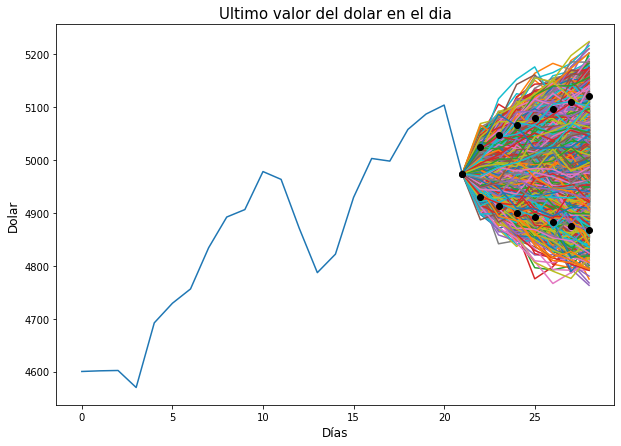

In [59]:
plt.figure(figsize=(10,7))
plt.plot(ul)

for Xi in estim_m:
    plt.plot(range(last, last+prediccion_dias+1), Xi)
    
plt.plot(range(last, last+prediccion_dias+1), upper, 'ok')
plt.plot(range(last, last+prediccion_dias+1), lower, 'ok')

plt.title('Ultimo valor del dolar en el dia', fontsize=15)
plt.xlabel('Días', fontsize=12)
plt.ylabel('Dolar', fontsize = 12)
plt.show()

In [60]:
means = []
for i in range(len(estim_m[0])):
    means.append(np.mean(estim_m[:, i]))
means[-1]

4992.485563695149

In [61]:
medians = mediana(estim_m, trayectorias)

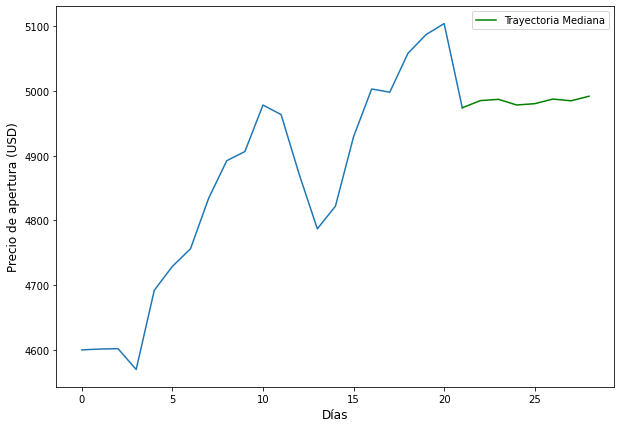

In [62]:
from __future__ import unicode_literals
upper2 = []
for i in range(len(estim_m[0])):
    upper2.append(np.percentile(estim_m[:,i], 60.5))

lower2 = []
for i in range(len(estim_m[0])):
    lower2.append(np.percentile(estim_m[:, i], 30.5))

plt.figure(figsize=(10,7))

plt.plot(ul)


#plt.plot(range(last, last+prediccion_dias+1), means, label='Trayectoria Media', color = 'r')
plt.plot(range(last, last+prediccion_dias+1), medians, label='Trayectoria Mediana', color = 'green')
#plt.plot(range(last, last+prediccion_dias+1), upper2, label = 'Banda Superior', color = 'black')

#plt.plot(range(last, last+prediccion_dias+1), lower2, label = 'Banda Inferior', color = 'black')

plt.xlabel('Días', fontsize=12)
plt.ylabel('Precio de apertura (USD)', fontsize = 12)
plt.legend()

plt.show()

In [63]:
print('El dolar dentro de 8 dias estara en',medians[-1])

El dolar dentro de 8 dias estara en 4991.834188200453
